In [16]:
import sys, getopt, datetime, os, glob, shutil

import rasterio


def calculate_RGB_VI_indices(pathS, pathDir,pathDSM):
    src = rasterio.open(pathS)
    dat = src.read()
    red = dat[0,:,:]
    green = dat[1,:,:]
    blue = dat[2,:,:]
    VIList = ['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B']
    print("In ra man hinh")
    prof = src.meta.copy()
    prof.update({"driver": "GTiff", 
                "height": red.shape[0],  
                "width": red.shape[1], 
                'count':1, 
                'dtype':rasterio.float64, 
                'compress':'lzw',
                'nodata':-1000})

    #VIdat = {}
    dat2 = (2*green - red - blue)/(2*green + red + blue)

    pathb8 = pathDir + 'Chua_Kham_Son_GLI.tif' 
    with rasterio.open(pathb8, "w", **prof) as dest:
        dest.write(dat2, 1)
    dat2 = (green - red)/(green + red)
    pathb8 = pathDir + 'Chua_Kham_Son_NGRDI.tif' 
    with rasterio.open(pathb8, "w", **prof) as dest:
        dest.write(dat2, 1)
    dat2 = red / (green + red + blue)
    pathb8 = pathDir + 'Chua_Kham_Son_Chromatic_R.tif' 
    with rasterio.open(pathb8, "w", **prof) as dest:
        dest.write(dat2, 1)
    dat2 = green / (green + red + blue)
    pathb8 = pathDir + 'Chua_Kham_Son_Chromatic_G.tif' 
    with rasterio.open(pathb8, "w", **prof) as dest:
        dest.write(dat2, 1)
    dat2 = blue / (green + red + blue)
    pathb8 = pathDir + 'Chua_Kham_Son_Chromatic_B.tif' 
    with rasterio.open(pathb8, "w", **prof) as dest:
        dest.write(dat2, 1)

    #copy DSM file
    new_filename = 'Chua_Kham_Son_DSM.tif'  # Replace with the desired new filename and extension
    # Copy the file to the destination folder with the new filename
    shutil.copy2(pathDSM, os.path.join(pathDir, new_filename))

In [17]:
#---------------------------------------------------------------------

#extract RGB_VI_Indices for training
pathS = 'E:/Computer Vision/Project2/Scenes_0.3m/10.Chua_Kham_Son/1_transparent_mosaic_group1_resample_03m.tif'
pathDir = 'E:/Computer Vision/Project2/Data/Training/RGB_VI_DSM_indices/'
pathDSM = 'E:/Computer Vision/Project2/Scenes_0.3m/10.Chua_Kham_Son/1_dsm_resample_03m.tif'
calculate_RGB_VI_indices(pathS, pathDir, pathDSM)

#extract RGB_VI_Indices for testing
pathS = 'E:/Computer Vision/Project2/Scenes_0.3m/10.Chua_Kham_Son/1_transparent_mosaic_group1_resample_03m.tif'
pathDir = 'E:/Computer Vision/Project2/Data/Testing/RGB_VI_DSM_indices/'
pathDSM = 'E:/Computer Vision/Project2/Scenes_0.3m/10.Chua_Kham_Son/1_dsm_resample_03m.tif'
calculate_RGB_VI_indices(pathS, pathDir, pathDSM)

In ra man hinh


C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\1739265125.py:30: RuntimeWarning: divide by zero encountered in divide
  dat2 = (2*green - red - blue)/(2*green + red + blue)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\1739265125.py:30: RuntimeWarning: invalid value encountered in divide
  dat2 = (2*green - red - blue)/(2*green + red + blue)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\1739265125.py:35: RuntimeWarning: divide by zero encountered in divide
  dat2 = (green - red)/(green + red)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\1739265125.py:35: RuntimeWarning: invalid value encountered in divide
  dat2 = (green - red)/(green + red)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\1739265125.py:39: RuntimeWarning: divide by zero encountered in divide
  dat2 = red / (green + red + blue)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\1739265125.py:39: RuntimeWarning: invalid value encountered in divide
  dat2 = red / (green + red + blue)
C:\Users\vutri\AppDat

In ra man hinh


In [18]:
# Function to create csv file

#import panda as pd
from osgeo import gdal
from collections import OrderedDict
import numpy as np
import glob, csv, os, itertools, fnmatch
import fiona
import rasterio
import rasterio.mask as mp

def make_csv_file(path_origin, pathCSV, pathShapefile, numPoly):
    lyr = {}
    for i in range(numPoly):
        with fiona.open(pathShapefile, "r") as shp:
            filtered = filter(lambda f: f['properties']['id']==i, shp)
            lyr[i] = [feature["geometry"] for feature in filtered]

    VIList = ['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B', 'DSM']

    names = {}
    types = {}
    for i in range(numPoly):
        with fiona.open(pathShapefile, "r") as shp:
            filtered = filter(lambda f: f['properties']['id']==i, shp)
            for feature in filtered:
                names[i] = feature['properties']['Name']
                types[i] = feature['properties']['Type'] 
                

    pathIn1 = path_origin
    fieldN = []
    fieldN.append(('No', 'None'))
    fieldN.append(('Type', 'None'))
    fieldN.append(('GLI', 'None'))
    fieldN.append(('NGRDI', 'None'))
    fieldN.append(('Chromatic_R', 'None'))
    fieldN.append(('Chromatic_G', 'None'))
    fieldN.append(('Chromatic_B', 'None'))
    fieldN.append(('DSM', 'None'))
    #fieldN.append(('VH', 'None'))

    fieldN = OrderedDict(fieldN)

    #sf1 = Functions_MODIS_BRDF_Model.SF() 

    fileN = pathCSV +  '10_Chua_Kham_Son.csv'
    fList=open(fileN, 'w', newline='')

    #print('Writing out to: {}/{}'.format(os.getcwd(), fileN))
    print('Writing out to: {}'.format(fileN))
    writer = csv.DictWriter(fList, fieldnames=fieldN)
    writer.writeheader()

    VI_src = {}
    os.chdir(path_origin) 
    for i in VIList:
        print(glob.glob('Chua_Kham_Son_*' + i + '*.tif'))
        if (len(glob.glob('Chua_Kham_Son_*' + i + '*.tif'))>0):
            l1 = glob.glob('Chua_Kham_Son_*' + i + '*.tif')
            VI_src[i] = rasterio.open(l1[0])
    count1 = 1
    for i in range(numPoly):
        arr_ref = {}
        for j in VIList:
            arr_ref[j], out_trans = mp.mask(VI_src[j], lyr[i], crop=True, nodata=-1000)
            rowCol = arr_ref[j].shape
            # print(rowCol)
        
        for k, l in itertools.product(range(rowCol[1]), range(rowCol[2])):
            rowWrite = {}
            rowWrite['No'] = count1
            rowWrite['Type'] = types[i]
            if float(arr_ref['GLI'][:,k,l]) != -1000:
                count1 = count1 + 1
                for j in VIList:
                    rowWrite[j] = float(arr_ref[j][:,k,l])
                writer.writerow(rowWrite)
                
    fList.close()

In [19]:
#Training
path_origin = 'E:/Computer Vision/Project2/Data/Training/RGB_VI_DSM_indices/'
pathCSV = 'E:/Computer Vision/Project2/Data/Training/CSV/'
pathShapefile = "E:/Computer Vision/Project2/Data/Training/Shapefile/Chua_Kham_Son.shp"
make_csv_file(path_origin, pathCSV, pathShapefile, 18)

#Testing
# path_origin = 'E:/Computer Vision/Project2/Data/Testing/RGB_VI_DSM_indices/'
# pathCSV = 'E:/Computer Vision/Project2/Data/Testing/CSV/'
# foler_path_Shapefiles = "E:/Computer Vision/Project2/Data/Testing/Shapefiles/"
# make_csv_file(path_origin, pathCSV, foler_path_Shapefiles)

Writing out to: E:/Computer Vision/Project2/Data/Training/CSV/10_Chua_Kham_Son.csv
['Chua_Kham_Son_GLI.tif']
['Chua_Kham_Son_NGRDI.tif']
['Chua_Kham_Son_Chromatic_R.tif']
['Chua_Kham_Son_Chromatic_G.tif']
['Chua_Kham_Son_Chromatic_B.tif']
['Chua_Kham_Son_DSM.tif']


C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\3941933296.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(arr_ref['GLI'][:,k,l]) != -1000:
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\3941933296.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rowWrite[j] = float(arr_ref[j][:,k,l])
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\3941933296.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(arr_ref['GLI'][:,k,l]) != -1000:
C:\U

In [20]:
# Testing
path_origin = 'E:/Computer Vision/Project2/Data/Testing/RGB_VI_DSM_indices/'
pathCSV = 'E:/Computer Vision/Project2/Data/Testing/CSV/'
pathShapefile = "E:/Computer Vision/Project2/Data/Testing/Shapefiles/Chua_Kham_Son_1.shp"
make_csv_file(path_origin, pathCSV, pathShapefile, 13)

Writing out to: E:/Computer Vision/Project2/Data/Testing/CSV/10_Chua_Kham_Son.csv
['Chua_Kham_Son_GLI.tif']
['Chua_Kham_Son_NGRDI.tif']
['Chua_Kham_Son_Chromatic_R.tif']
['Chua_Kham_Son_Chromatic_G.tif']
['Chua_Kham_Son_Chromatic_B.tif']
['Chua_Kham_Son_DSM.tif']


C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\3941933296.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(arr_ref['GLI'][:,k,l]) != -1000:
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\3941933296.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rowWrite[j] = float(arr_ref[j][:,k,l])
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\3941933296.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(arr_ref['GLI'][:,k,l]) != -1000:
C:\U

In [21]:
#Prepare data and train models
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib, os
from osgeo import gdal, gdal_array
import numpy as np
#import matplotlib.pyplot as plt
import rasterio, glob

path_origin = 'E:/Computer Vision/Project2/Data/Training/Split/'
VIList = ['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B']

pathData = 'E:/Computer Vision/Project2/Data/Training/CSV/10_Chua_Kham_Son.csv'

dat = pd.read_csv(pathData)
X_train=dat[['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B', 'DSM']]
y_train = dat['Type']
clf=RandomForestClassifier(n_estimators= 100, max_depth=5)
svc_model = SVC()
knn = KNeighborsClassifier(n_neighbors=3)
# X_train = X_train.dropna() #drop NaN values

#handle values of X_train and y_train: NaN, infinite
#-------------------------------------------------------------------------------------
train_data = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

# Drop rows with missing values
train_data.dropna(inplace=True)

# Split the data back into X_train and y_train
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_train[~np.isfinite(X_train)] = np.finfo(X_train.dtype).max

# Remove rows with large values
row_mask = np.abs(X_train).max(axis=1) < np.finfo(X_train.dtype).max
X_train = X_train[row_mask]
y_train = y_train[row_mask]
X_train = X_train.astype('float64')

#-------------------------------------------------------------------------------------
# train models
clf.fit(X_train,y_train)
svc_model.fit(X_train, y_train)
knn.fit(X_train, y_train)
# filename = 'E:/Computer Vision/Project2/Data/Training/CSV/finalized_model_RF_site_0_v01.sav'
# joblib.dump(clf, filename) #save to file
#testing data
pathData = 'E:/Computer Vision/Project2/Data/Testing/CSV/10_Chua_Kham_Son.csv'

dat = pd.read_csv(pathData)

X_test=dat[['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B', 'DSM']]
y_test = dat['Type']
#handle values of X_test and y_test: NaN, infinite
X_test = X_test.replace([np.inf, -np.inf], np.finfo(np.float32).max)
threshold = 1e9  # Adjust the threshold value as needed
row_mask = (X_test.abs() < threshold).all(axis=1)
X_test = X_test[row_mask]
y_test = y_test[row_mask]
X_test = X_test.astype('float64')

# y_pred=clf.predict(X_test)
# print("Accuracy of RFC:",metrics.accuracy_score(y_test, y_pred))

# # feature_imp = pd.Series(clf.feature_importances_,index=['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B', 'DSM']).sort_values(ascending=False)
# # print(feature_imp)

# y_pred = svc_model.predict(X_test)
# print("Accuracy of SVC:", metrics.accuracy_score(y_test, y_pred))

# y_pred = knn.predict(X_test)
# print("Accuracy of KNN:",metrics.accuracy_score(y_test, y_pred))


c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning

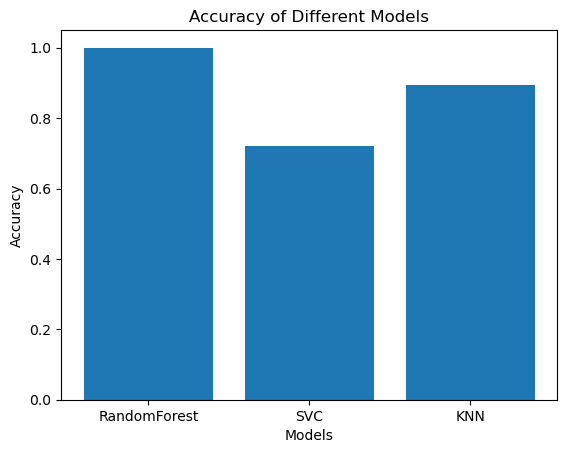

In [22]:
#Accuracy of each model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# RandomForestClassifier (clf)
y_pred = clf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)

# SVC (svc_model)
y_pred = svc_model.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred)

# KNN (knn)
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)

#Bar plot to display accuracy of Randomforest, svc, knn models
accuracy_scores = [metrics.accuracy_score(y_test, clf.predict(X_test)),
                   metrics.accuracy_score(y_test, svc_model.predict(X_test)),
                   metrics.accuracy_score(y_test, knn.predict(X_test))]

# Create a bar plot
plt.bar(['RandomForest', 'SVC', 'KNN'], accuracy_scores)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Show the plot
plt.show()


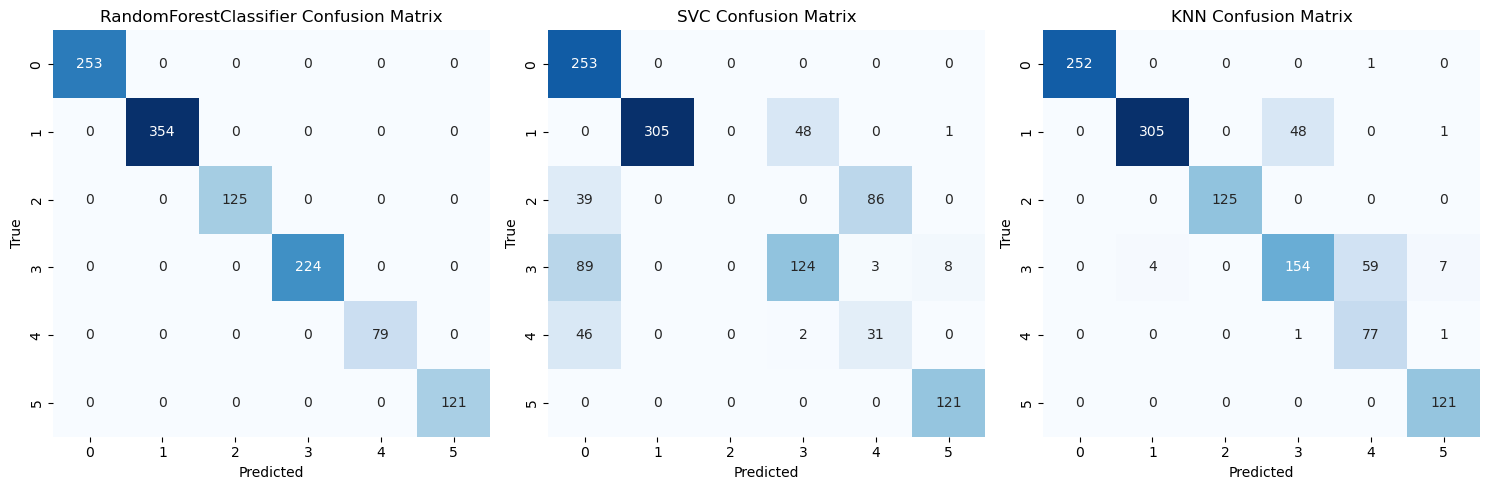

In [23]:
#Confustion matrix
# Create subplots for each confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot RandomForestClassifier confusion matrix
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[0])
axes[0].set_title("RandomForestClassifier Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Plot SVC confusion matrix
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[1])
axes[1].set_title("SVC Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

# Plot KNN confusion matrix
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[2])
axes[2].set_title("KNN Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("True")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
# apply the model for the whole image and write out the resulting raster file
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib, os
from osgeo import gdal, gdal_array
import numpy as np
#import matplotlib.pyplot as plt
import rasterio, glob
pathIn = "E:/Computer Vision/Project2/Data/Training/RGB_VI_DSM_indices/"

pathOut = 'E:/Computer Vision/Project2/Classification/'

VIList = ['GLI', 'NGRDI', 'Chromatic_R', 'Chromatic_G', 'Chromatic_B', 'DSM']

count = 0
dat = pd.DataFrame()
os.chdir(pathIn)
for k in VIList:
    globText = 'Chua_Kham_Son_' + k + '.tif'

    if (len(glob.glob(globText))>0):
        l1 = glob.glob(globText)
        ds = gdal.Open(l1[0])
        arr = ds.ReadAsArray()
        nrow = ds.RasterYSize
        ncol = ds.RasterXSize
        dat[k] = gdal.Open(l1[0]).ReadAsArray().flatten()
        count += 1

if count==6:         
    if dat['DSM'].value_counts()[-10000] == nrow*ncol:
        arr_res = np.zeros((nrow, ncol), dtype=np.uint8)
    else:
        #--------------------------------
        dat = dat.fillna(dat.mean())
        dat[np.isinf(dat)] = 1e10
        #--------------------------------
        y_pred1 = clf.predict(dat)            
        arr_res = np.reshape(y_pred1, (nrow, ncol)).astype(np.uint8)
    src = rasterio.open(l1[0])

    unique_values, counts = np.unique(arr_res, return_counts=True)
    for value, count in zip(unique_values, counts):
        print(f"Value: {value}, Frequency: {count}")

    prof = src.meta.copy()
    prof.update({"driver": "GTiff", 
                    'count':1, 
                    #'dtype':rasterio.float64, 
                    'dtype':rasterio.uint8, 
                    'compress':'lzw',
                    'nodata':0})
    
    pathRes = pathOut + 'Chua_Kham_Son_Classified.tif'
    with rasterio.open(pathRes, 'w', **prof) as dest:
        print("Write to", pathRes)
        dest.write(arr_res, 1)


c:\Users\vutri\anaconda3\envs\project_2\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Value: 0, Frequency: 39020
Value: 1, Frequency: 35867
Value: 2, Frequency: 58436
Value: 3, Frequency: 39079
Value: 4, Frequency: 254799
Value: 5, Frequency: 51752
Write to E:/Computer Vision/Project2/Classification/Chua_Kham_Son_Classified.tif


In [25]:
#polyginoze_classification
import rasterio
from rasterio.features import shapes
import json
import fiona
from fiona.crs import from_epsg

def geojson_to_shapefile(
    #crs: int = 4326,
    crs1,
    input_data,
    #input_file: str = "fixtures/buildings-centroid.geojson",
    output_file: str = "out.shp",
) -> None:
    """
    Read GeoJSON and convert to ESRI Shapefile.

    Which properties are to be written to the ESRI Shapefile
    has to be definied manually.
    """
    #with open(input_file, "r") as json_file:
    #    geojson = json.load(json_file)
    #geojson = input_data
    # Assuming geometry type of every feature is the same.
    #geometry_type = geojson["features"][0]["geometry"]["type"]
    # Properties and their field types.
    property_types = {"raster_val":'int', "No":'int'}
    schema = {"geometry": "Polygon", "properties": property_types}

    with fiona.open(output_file, "w", driver="ESRI Shapefile", crs=crs1, schema=schema) as shapefile:
        n = len(input_data)
        for i in range(0,n):
            # Keep only properties of feature definied in property_types.
            feature = input_data[i]
            shapefile.write(feature)


path = "E:/Computer Vision/Project2/Scenes_0.3m/10.Chua_Kham_Son/1_transparent_mosaic_group1_resample_03m.tif"
mask = None
with rasterio.open(path) as srcMask:
    mask = srcMask.read(1)
    
segimg= "E:/Computer Vision/Project2/Classification/Chua_Kham_Son_Classified.tif"

with rasterio.Env():
    with rasterio.open(segimg) as src:
        image = src.read(1) # first band
        crs1 = src.crs
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) in enumerate(
            shapes(image, mask=mask, transform=src.transform)))
geoms = list(results)
len1 = len(geoms)
for i in range (0,len1):
    geoms[i]['properties']['No'] = i+1
pathout = 'E:/Computer Vision/Project2/Classification/out_sample.shp'

crs1 = from_epsg(32648)
geojson_to_shapefile(crs1, geoms, pathout)

In [26]:
from osgeo import gdal
import rasterio, fiona
import rasterio.mask as mp
import pandas as pd
import numpy as np
from fiona.crs import from_epsg

pathin = "E:/Computer Vision/Project2/Classification/out_sample.shp"
dsm= "E:/Computer Vision/Project2/Scenes_0.3m/10.Chua_Kham_Son/1_dsm_resample_03m.tif"
pathout = 'E:/Computer Vision/Project2/Classification/out_sample_dsm_v3.shp'

lyr2 = {}
src = rasterio.open(dsm)
shp = fiona.open(pathin, "r")
n = len(shp)
schema2 = shp.schema.copy() 
schema2['properties']['dsm'] = 'float'

shp2 = fiona.open(pathout, "w", driver="ESRI Shapefile", crs=from_epsg(32648), schema=schema2)

for i in range(0,n):
    #print(i)
    #filtered = filter(lambda f: f['properties']['No']==(i+1), shp)
    # = shp[i]
    #lyr2 = [feature["geometry"] for feature in filtered]
    #lyr2 = [feature["geometry"] for feature in filtered]
    lyr2 = [shp[i]["geometry"]]
    # if i%2000==0:
    #     print(i)
    #print(lyr2)
    cropRaster, out_trans = mp.mask(src, lyr2, crop=True, nodata = -10000)  
    val = cropRaster[cropRaster> -1000].mean()
    a = shp[i]
    a = shp[i]
    a['properties']['dsm'] = float(val)
    shp2.write(a)
shp2.close()
shp.close()

C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\395956465.py:35: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  a['properties']['dsm'] = float(val)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\395956465.py:35: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  a['properties']['dsm'] = float(val)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\395956465.py:35: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  a['properties']['dsm'] = float(val)
C:\Users\vutri\AppData\Local\Temp\ipykernel_22628\395956465.py:35: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  a['properties']['dsm'] = float(val)
C:\Users\vutri\AppData\Local\Temp\ipykernel_2262